In [1]:
pip install opencv-python

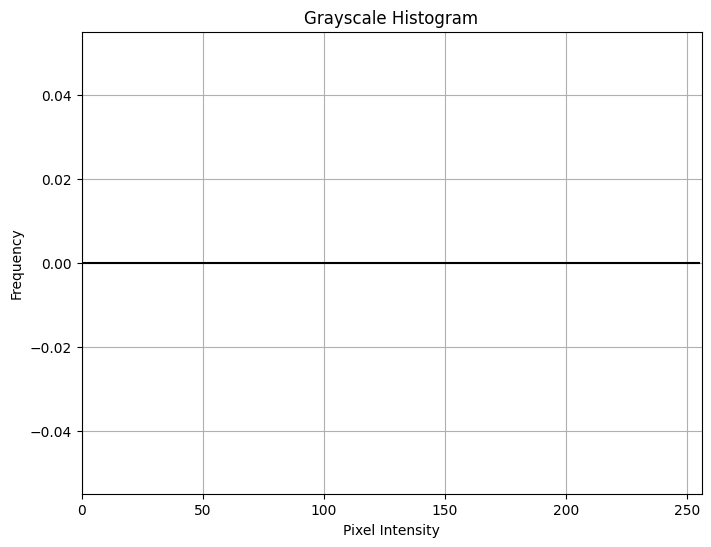

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale)
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Compute histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.grid()
plt.show()


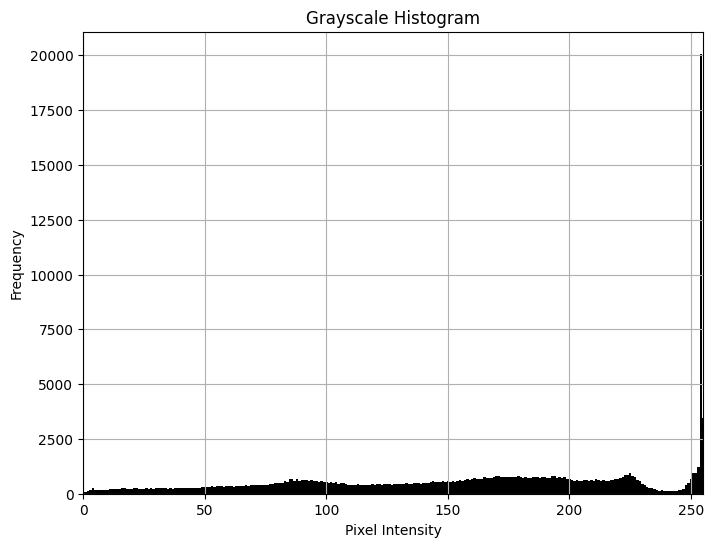

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute histogram manually
histogram = np.zeros(256, dtype=int)

for pixel in image.flatten():  # Flatten image array into 1D
    histogram[pixel] += 1

# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(range(256), histogram, color='black', width=1)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid()
plt.show()


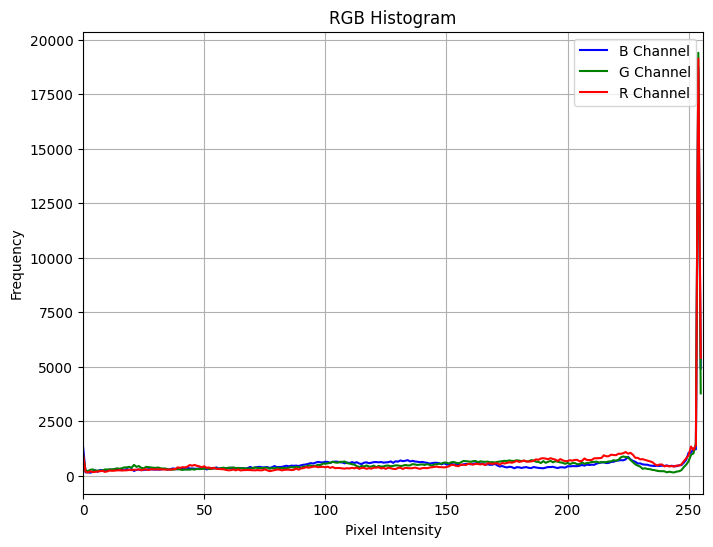

In [4]:
# Load the image in color
image = cv2.imread('/content/drive/MyDrive/faces.jpg')

# Split channels
channels = ('b', 'g', 'r')
colors = ('blue', 'green', 'red')

plt.figure(figsize=(8, 6))

for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'{channels[i].upper()} Channel')

plt.title('RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid()
plt.show()


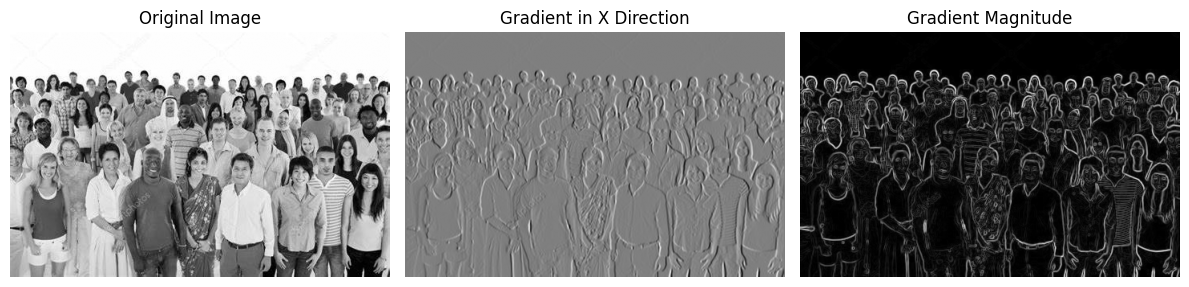

In [9]:
#gradient magnitude
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradients using Sobel operator
Gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
Gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Compute gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# Normalize for visualization
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X Direction')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


#Sobel

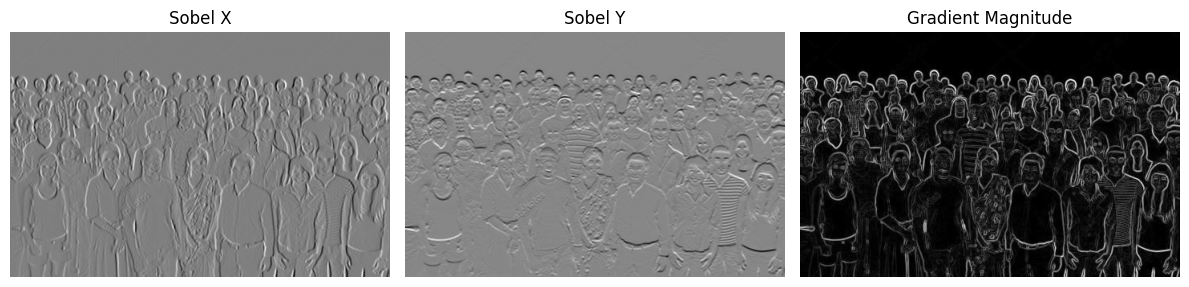

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator in X and Y direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y-direction

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize to 0-255 range
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


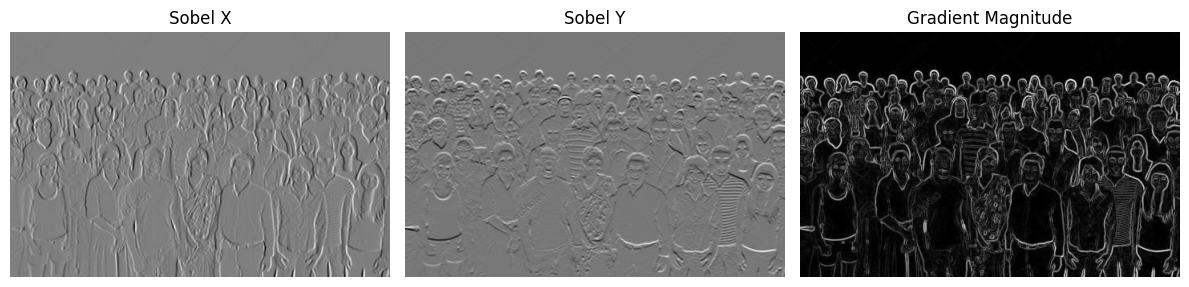

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Define Sobel kernels
sobel_x_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]])

# Apply convolution
sobel_x = convolve(image.astype(np.float32), sobel_x_kernel)
sobel_y = convolve(image.astype(np.float32), sobel_y_kernel)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize to 0-255
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


#Laplacian, Laplacian of Gaussian

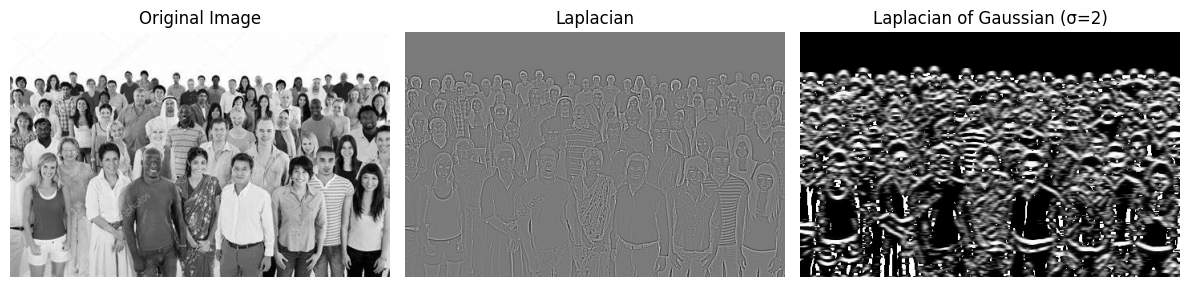

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Apply Laplacian of Gaussian (LoG)
sigma = 2  # Standard deviation for Gaussian blur
log = gaussian_laplace(image, sigma=sigma)

# Display Results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(log, cmap='gray')
plt.title(f'Laplacian of Gaussian (σ={sigma})')
plt.axis('off')

plt.tight_layout()
plt.show()


#Gaussian Blurred

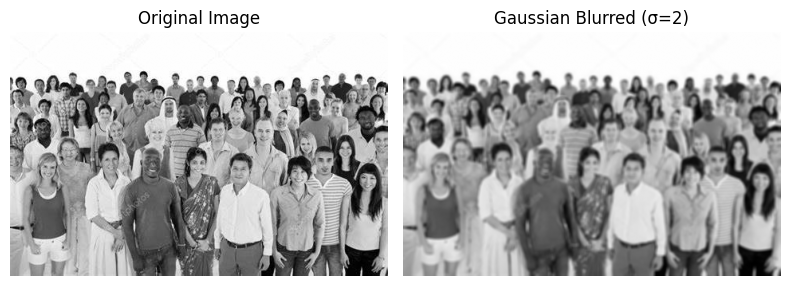

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
sigma = 2  # Standard deviation for Gaussian kernel
blurred = cv2.GaussianBlur(image, (5, 5), sigma)

# Display the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title(f'Gaussian Blurred (σ={sigma})')
plt.axis('off')

plt.tight_layout()
plt.show()


#difference of gaussian


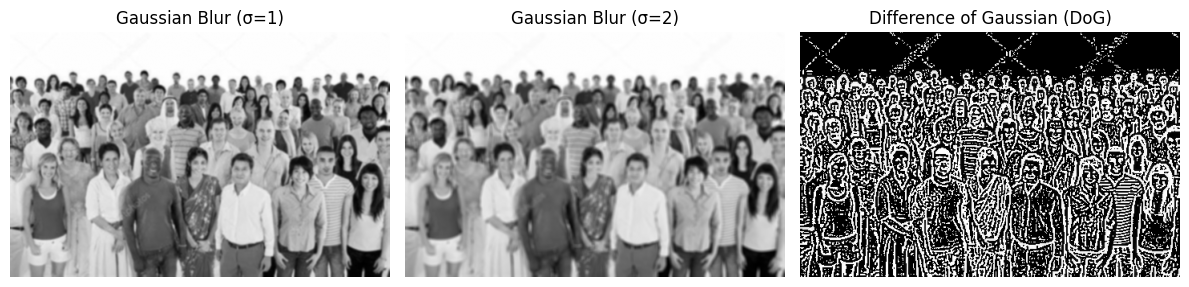

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur with two different sigma values
blur_1 = cv2.GaussianBlur(image, (5, 5), 1)   # σ = 1
blur_2 = cv2.GaussianBlur(image, (5, 5), 2)   # σ = 2

# Compute Difference of Gaussian (DoG)
dog = blur_1 - blur_2

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(blur_1, cmap='gray')
plt.title('Gaussian Blur (σ=1)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_2, cmap='gray')
plt.title('Gaussian Blur (σ=2)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dog, cmap='gray')
plt.title('Difference of Gaussian (DoG)')
plt.axis('off')

plt.tight_layout()
plt.show()


#Canny edge

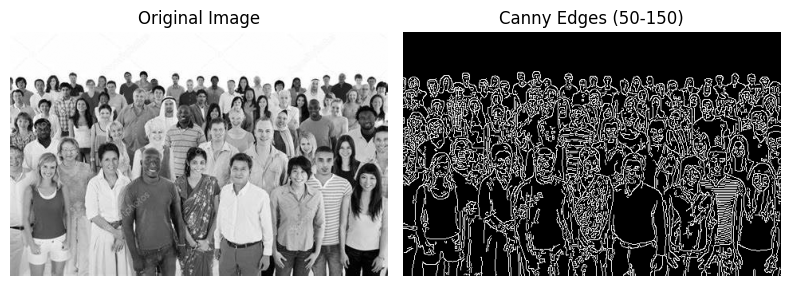

In [7]:

import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection
low_threshold = 50  # Lower threshold for edges
high_threshold = 150  # Upper threshold for strong edges
edges = cv2.Canny(image, low_threshold, high_threshold)

# Display the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title(f'Canny Edges ({low_threshold}-{high_threshold})')
plt.axis('off')

plt.tight_layout()
plt.show()


#Non maximum supression


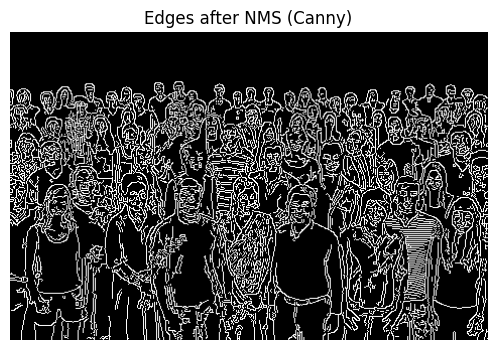

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection (includes NMS)
edges = cv2.Canny(image, 50, 150)

# Display results
plt.figure(figsize=(8, 4))
plt.imshow(edges, cmap='gray')
plt.title('Edges after NMS (Canny)')
plt.axis('off')
plt.show()


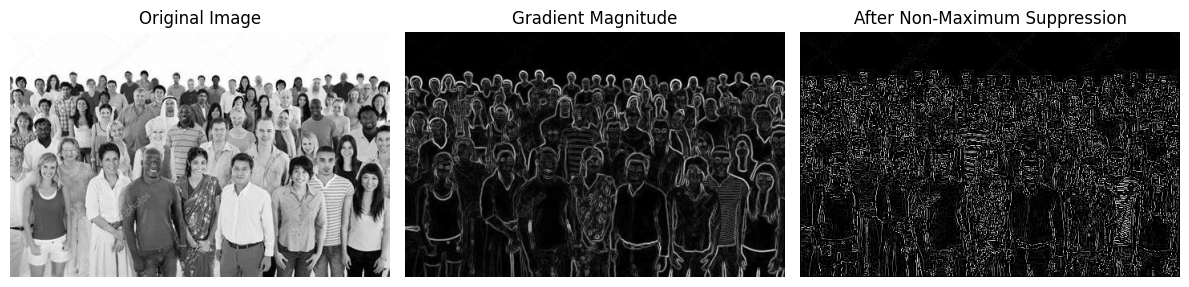

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradients using Sobel filters
Gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_direction = np.arctan2(Gy, Gx) * (180 / np.pi)  # Convert to degrees

# Normalize angles to [0, 180] range
gradient_direction[gradient_direction < 0] += 180

# Non-Maximum Suppression (NMS)
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    nms_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = direction[i, j]

            # Define neighbors based on gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif (22.5 <= angle < 67.5):
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif (67.5 <= angle < 112.5):
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            else:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            # Suppress non-maximum values
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                nms_image[i, j] = magnitude[i, j]
            else:
                nms_image[i, j] = 0

    return nms_image

# Apply NMS
nms_result = non_maximum_suppression(gradient_magnitude, gradient_direction)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nms_result, cmap='gray')
plt.title('After Non-Maximum Suppression')
plt.axis('off')

plt.tight_layout()
plt.show()


#Double thresholding

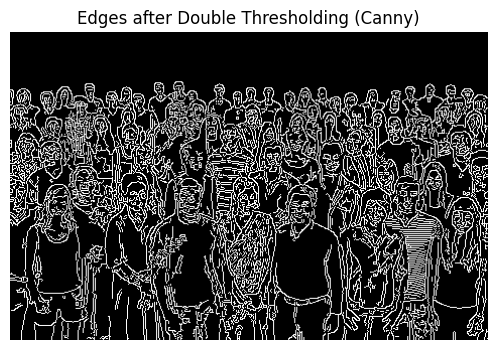

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection with double thresholding
edges = cv2.Canny(image, 50, 150)  # Lower threshold = 50, Upper threshold = 150

# Display results
plt.figure(figsize=(8, 4))
plt.imshow(edges, cmap='gray')
plt.title('Edges after Double Thresholding (Canny)')
plt.axis('off')
plt.show()


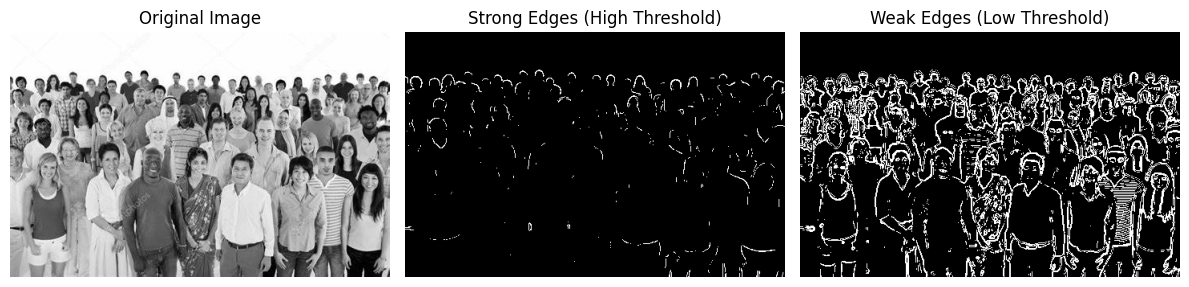

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradients using Sobel filters
Gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_direction = np.arctan2(Gy, Gx) * (180 / np.pi)

# Normalize gradient magnitude to [0, 255]
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Define thresholds
low_threshold = 50
high_threshold = 150

# Apply double thresholding
strong_edges = (gradient_magnitude >= high_threshold).astype(np.uint8) * 255
weak_edges = ((gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)).astype(np.uint8) * 255

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(strong_edges, cmap='gray')
plt.title('Strong Edges (High Threshold)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(weak_edges, cmap='gray')
plt.title('Weak Edges (Low Threshold)')
plt.axis('off')

plt.tight_layout()
plt.show()


#edge tracking  by hysteresis


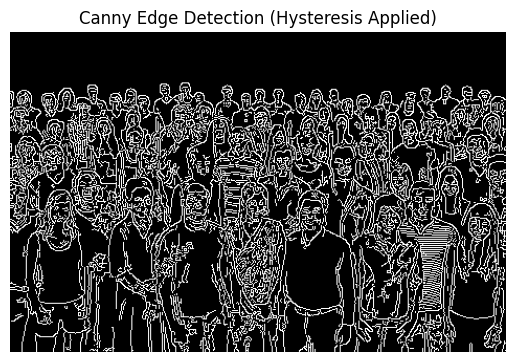

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection (includes hysteresis)
edges = cv2.Canny(image, 50, 150)  # Low threshold = 50, High threshold = 150

# Display results
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection (Hysteresis Applied)')
plt.axis('off')
plt.show()


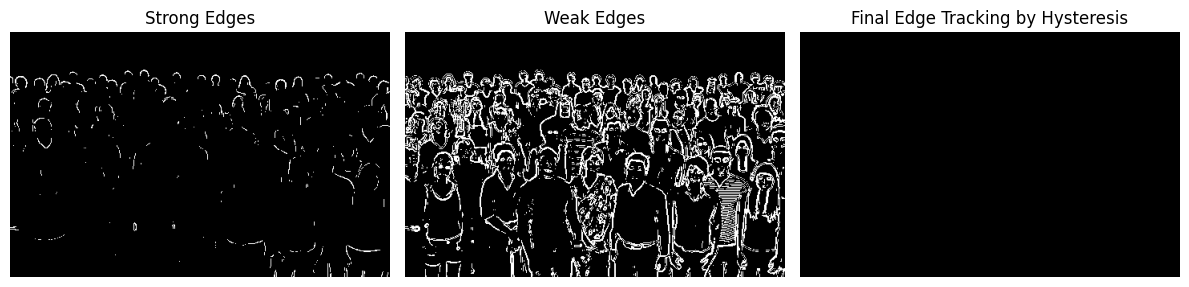

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load image in grayscale
#image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Compute gradient using Sobel
Gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255  # Normalize to 0-255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Apply double thresholding
low_thresh, high_thresh = 50, 150
strong_edges = (gradient_magnitude >= high_thresh).astype(np.uint8) * 255
weak_edges = ((gradient_magnitude >= low_thresh) & (gradient_magnitude < high_thresh)).astype(np.uint8) * 255

# Edge Tracking by Hysteresis
# Label connected components in strong edges
labeled, num_features = label(strong_edges)

# Retain weak edges connected to strong edges
hysteresis_edges = np.zeros_like(gradient_magnitude)

for i in range(1, num_features + 1):
    mask = labeled == i
    if np.any(mask & weak_edges):
        hysteresis_edges[mask | weak_edges] = 255

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(strong_edges, cmap='gray')
plt.title('Strong Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(weak_edges, cmap='gray')
plt.title('Weak Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hysteresis_edges, cmap='gray')
plt.title('Final Edge Tracking by Hysteresis')
plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
import cv2
import numpy as np

# Load image in grayscale
#image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Print pixel values
print(image)


[[255 255 255 ... 255 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 252 254 254]
 ...
 [158 157 155 ...  52  34  34]
 [155 151 151 ...  33  46  80]
 [155 151 151 ...  33  46  80]]


#Wavelet transforms


In [27]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.3 MB/s eta 0:00:00


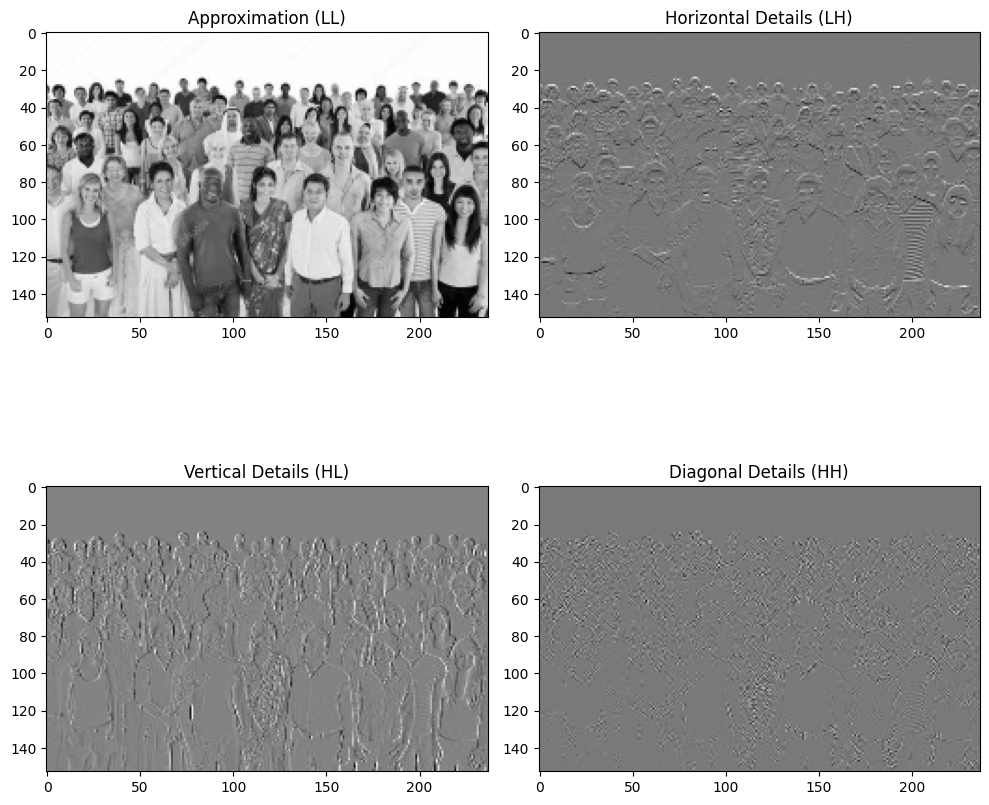

In [31]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Discrete Wavelet Transform (DWT) using Haar wavelet
coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2  # Decomposed components

# Display results
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Details (LH)')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Details (HL)')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Details (HH)')

plt.tight_layout()
plt.show()


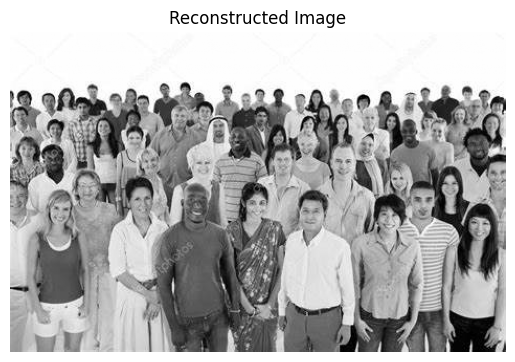

In [32]:
reconstructed_image = pywt.idwt2(coeffs2, 'haar')

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


<ipython-input-35-238580bd1258>:29: RuntimeWarning: overflow encountered in scalar add
  LL[i//2, j//2] = (a + b + c + d) / 4  # Approximation
<ipython-input-35-238580bd1258>:31: RuntimeWarning: overflow encountered in scalar add
  HL[i//2, j//2] = (a + b - c - d) / 4  # Vertical Details
<ipython-input-35-238580bd1258>:31: RuntimeWarning: overflow encountered in scalar subtract
  HL[i//2, j//2] = (a + b - c - d) / 4  # Vertical Details
<ipython-input-35-238580bd1258>:32: RuntimeWarning: overflow encountered in scalar subtract
  HH[i//2, j//2] = (a - b - c + d) / 4  # Diagonal Details
<ipython-input-35-238580bd1258>:32: RuntimeWarning: overflow encountered in scalar add
  HH[i//2, j//2] = (a - b - c + d) / 4  # Diagonal Details
<ipython-input-35-238580bd1258>:30: RuntimeWarning: overflow encountered in scalar subtract
  LH[i//2, j//2] = (a - b + c - d) / 4  # Horizontal Details
<ipython-input-35-238580bd1258>:30: RuntimeWarning: overflow encountered in scalar add
  LH[i//2, j//2] = (a -

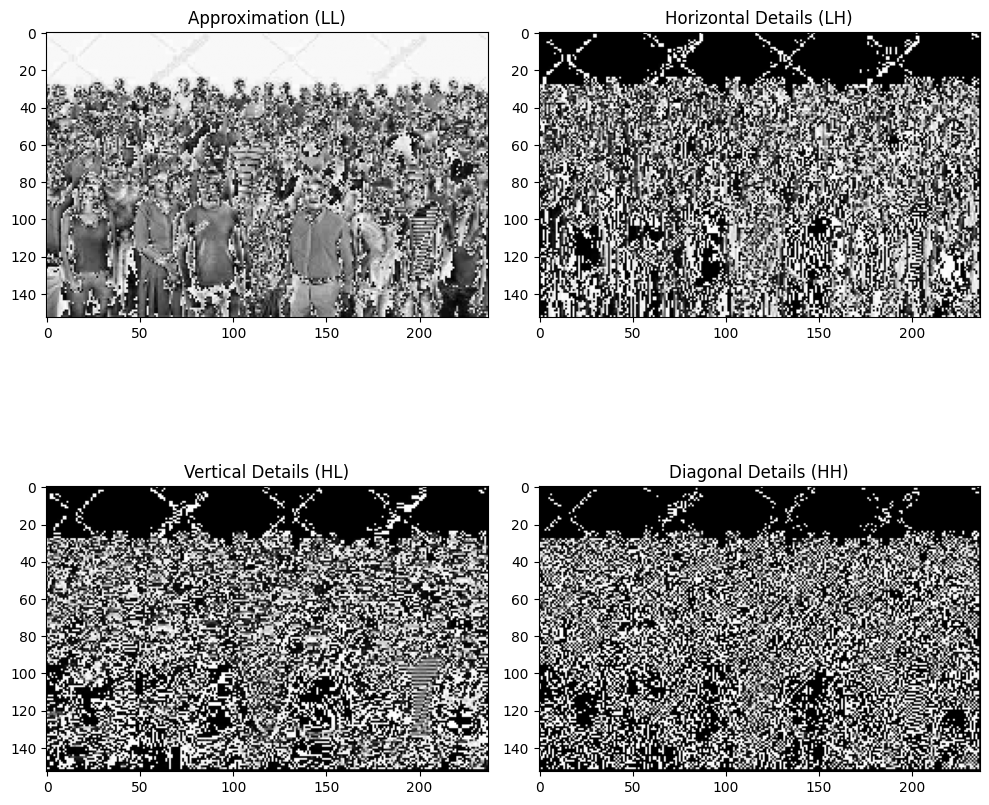

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Ensure even dimensions (required for Haar transform)
h -= h % 2
w -= w % 2
image = image[:h, :w]

# Haar Wavelet Transform (1-level decomposition)
def haar_transform(img):
    h, w = img.shape
    LL = np.zeros((h//2, w//2))
    LH = np.zeros((h//2, w//2))
    HL = np.zeros((h//2, w//2))
    HH = np.zeros((h//2, w//2))

    for i in range(0, h, 2):
        for j in range(0, w, 2):
            # Extract 2×2 block
            a, b = img[i, j], img[i, j+1]
            c, d = img[i+1, j], img[i+1, j+1]

            # Compute Haar wavelet coefficients
            LL[i//2, j//2] = (a + b + c + d) / 4  # Approximation
            LH[i//2, j//2] = (a - b + c - d) / 4  # Horizontal Details
            HL[i//2, j//2] = (a + b - c - d) / 4  # Vertical Details
            HH[i//2, j//2] = (a - b - c + d) / 4  # Diagonal Details

    return LL, LH, HL, HH

# Apply Haar Wavelet Transform
LL, LH, HL, HH = haar_transform(image)

# Display the decomposed images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Details (LH)')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Details (HL)')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Details (HH)')

plt.tight_layout()
plt.show()


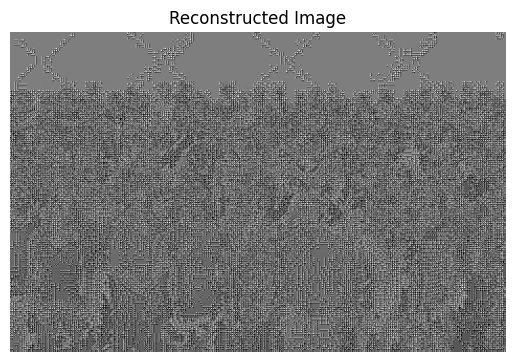

In [40]:
def inverse_haar_transform(LL, LH, HL, HH):
    h, w = LL.shape[0] * 2, LL.shape[1] * 2
    reconstructed = np.zeros((h, w))

    for i in range(LL.shape[0]):
        for j in range(LL.shape[1]):
            # Retrieve Haar coefficients
            a = LL[i, j] + LH[i, j] + HL[i, j] + HH[i, j]
            b = LL[i, j] - LH[i, j] + HL[i, j] - HH[i, j]
            c = LL[i, j] + LH[i, j] - HL[i, j] - HH[i, j]
            d = LL[i, j] - LH[i, j] - HL[i, j] + HH[i, j]

            # Place values back in 2×2 block
            reconstructed[2*i, 2*j] = a
            reconstructed[2*i, 2*j+1] = b
            reconstructed[2*i+1, 2*j] = c
            reconstructed[2*i+1, 2*j+1] = d

    return reconstructed

# Reconstruct the image
reconstructed_image = inverse_haar_transform(LL, LH, HL, HH)

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')

plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


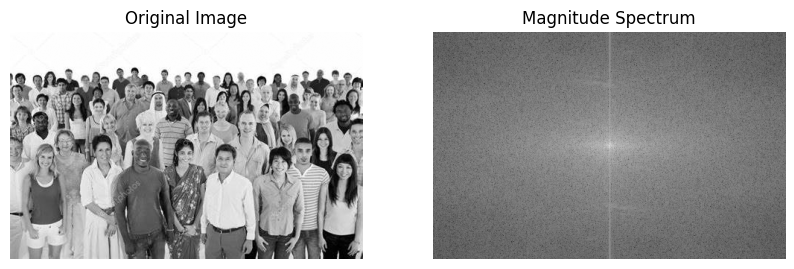

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# Display original and magnitude spectrum
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


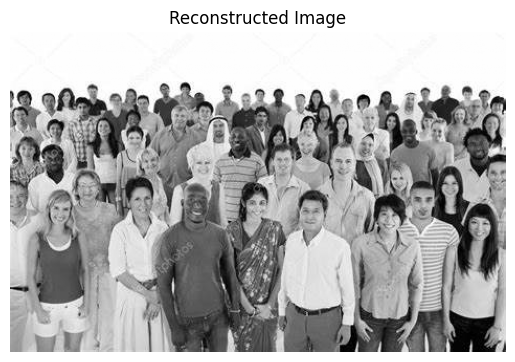

In [42]:
# Shift back and apply inverse transform
dft_ishift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(dft_ishift)
reconstructed_image = np.abs(reconstructed_image)

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


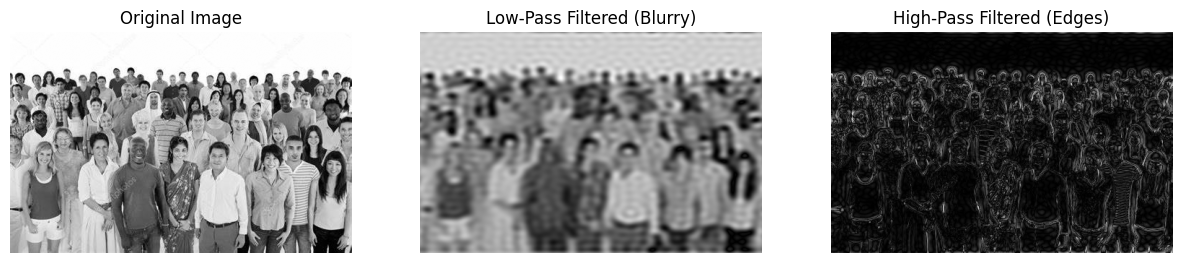

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('/content/drive/MyDrive/faces.jpg', cv2.IMREAD_GRAYSCALE)

# Compute 2D Fourier Transform and shift the zero frequency component to the center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create a Low-Pass Filter (LPF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center coordinates

# Define filter size
filter_size = 30  # Radius of the low-pass filter

# Create a mask with a circular low-pass filter
low_pass_mask = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_mask, (ccol, crow), filter_size, 1, -1)

# Apply LPF to frequency domain
dft_low = dft_shift * low_pass_mask

# Create a High-Pass Filter (HPF)
high_pass_mask = 1 - low_pass_mask  # Invert LPF to get HPF
dft_high = dft_shift * high_pass_mask

# Compute inverse DFT to get images back
def inverse_fft(dft_filtered):
    dft_ishift = np.fft.ifftshift(dft_filtered)
    img_back = np.fft.ifft2(dft_ishift)
    return np.abs(img_back)

low_pass_result = inverse_fft(dft_low)
high_pass_result = inverse_fft(dft_high)

# Display images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(low_pass_result, cmap='gray')
plt.title('Low-Pass Filtered (Blurry)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(high_pass_result, cmap='gray')
plt.title('High-Pass Filtered (Edges)')
plt.axis('off')

plt.show()
